# Telco Customer Churn
This notebook analyzes the Telco Customer Churn dataset and builds a Logistic Regression model to identify key factors driving churn.

### Basic Dataset Cleaning

In [103]:
import pandas as pd

#### Dataset Overview
- Load dataset
- Preview first few rows
- Check data types
- Check missing values & duplicates


In [104]:
# reading the csv into pandas dataframe
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("read successfully")

read successfully


In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [107]:
df.isnull().sum() #checking for nulls

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [108]:
df.duplicated().sum() #checking for duplicate records

np.int64(0)

In [109]:
df[df['TotalCharges'].astype(str).str.strip().eq('')] #checking for the rows where TotalCharges is ' ' before converting its datatype to float

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### Data Cleaning
- Handle blank values in `TotalCharges`
- Convert `TotalCharges` to float
- Encode categorical variables
- Confirm dataset sanity before modeling

In [110]:
import numpy as np

#stripping the blanks in TotalCharges and converting the column to float from object
df['TotalCharges'] = (df['TotalCharges'].astype(str).str.strip().replace('', np.nan).astype(float))

In [111]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [112]:
unique_values = {col: df[col].unique() for col in df.columns} #looking at unique values for ML later on
unique_values

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], shape=(7043,), dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No inter

In [113]:
#converting extra No's to only NO for easier ML categorization 

replace_cols = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [114]:
#converting all the Yes/no to category datatype 

cat_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn'
]

for col in cat_cols:
    df[col] = df[col].astype('category')

In [115]:
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

### EDA

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

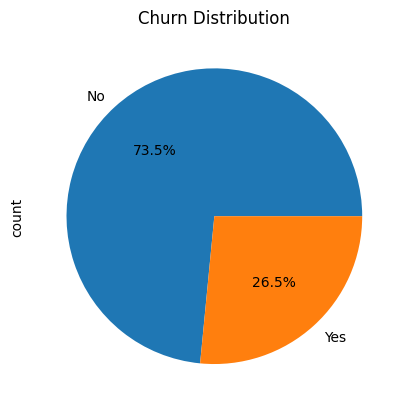

In [117]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Churn Distribution")
plt.show()

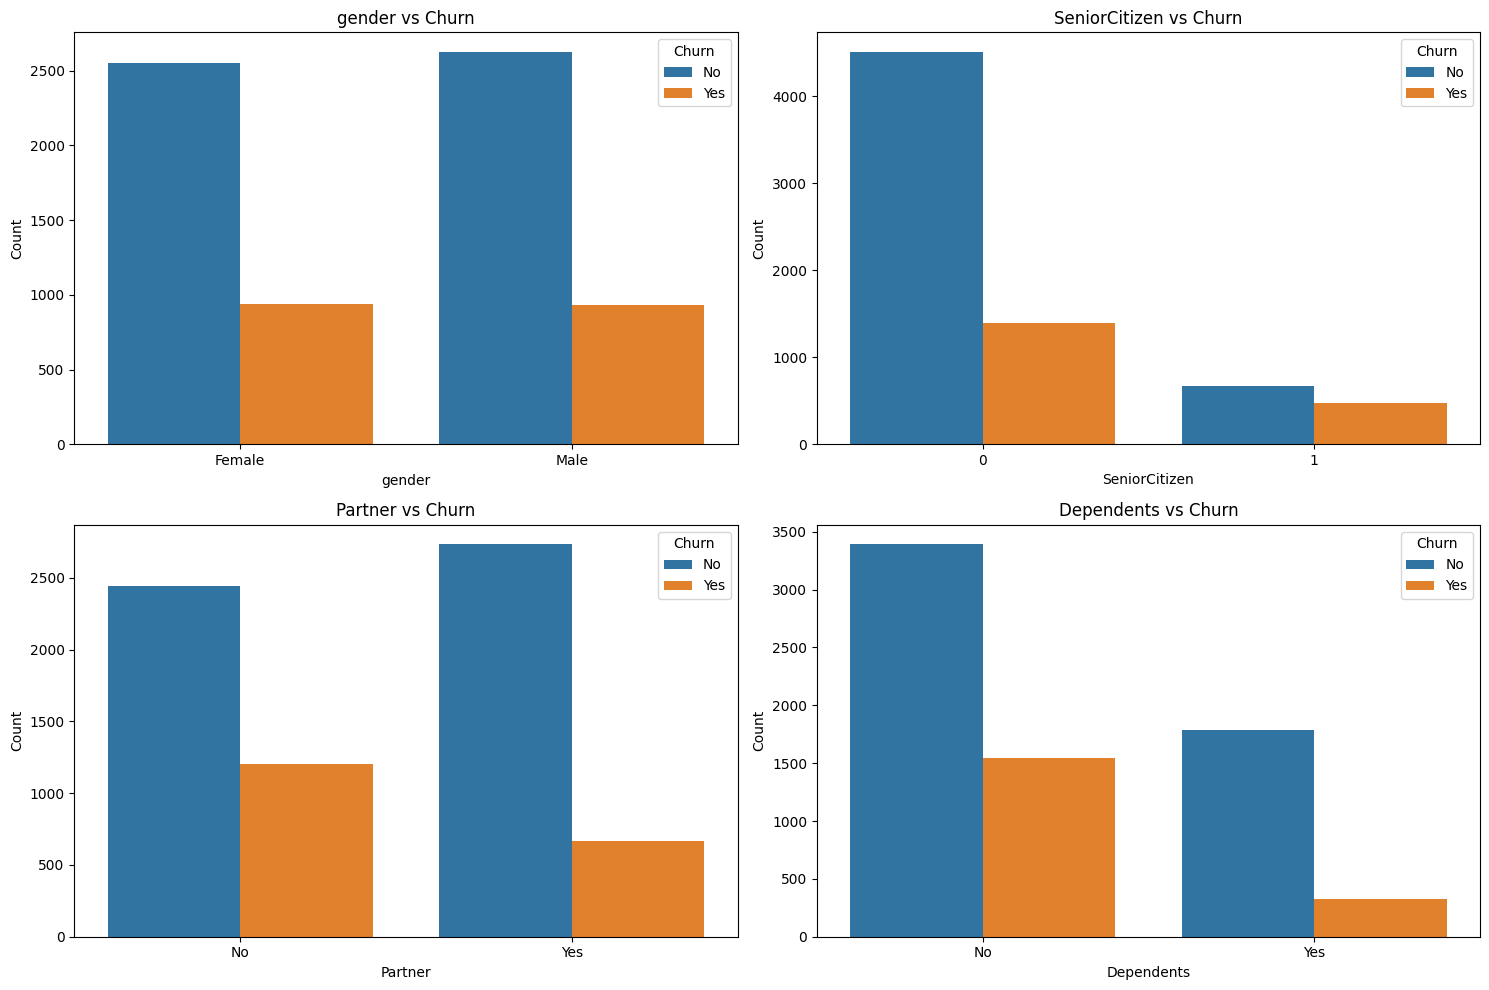

In [118]:
plt.figure(figsize=(15,10))

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

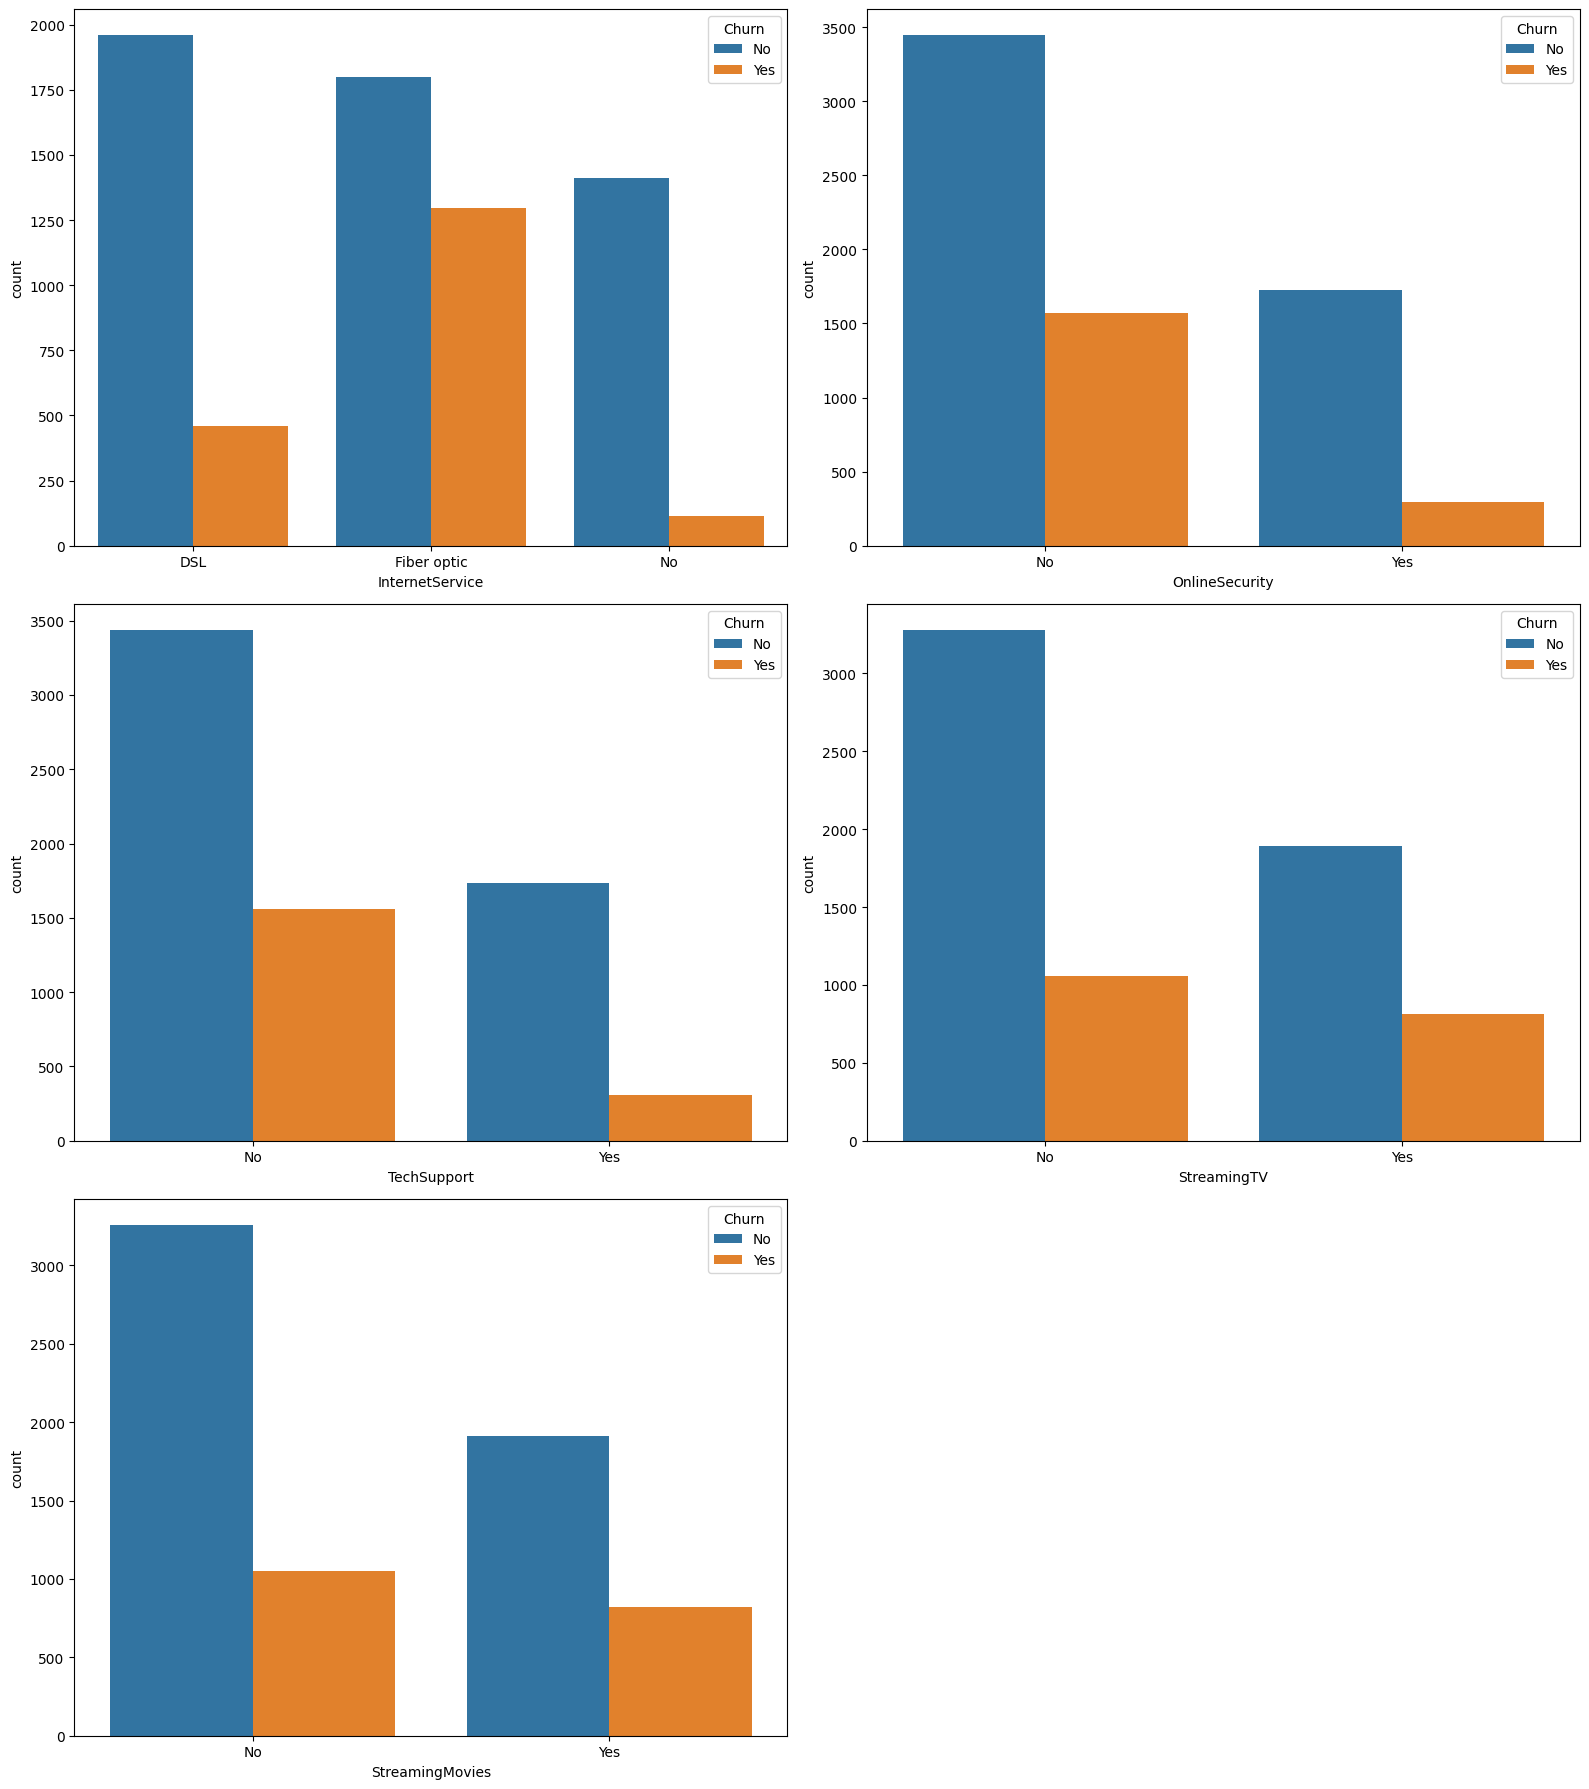

In [119]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0,0])
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=axes[0,1])
sns.countplot(data=df, x='TechSupport', hue='Churn', ax=axes[1,0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=axes[1,1])
sns.countplot(data=df, x='StreamingMovies', hue='Churn', ax=axes[2,0])

axes[2,1].axis('off')  # last cell empty

plt.tight_layout()
plt.show()

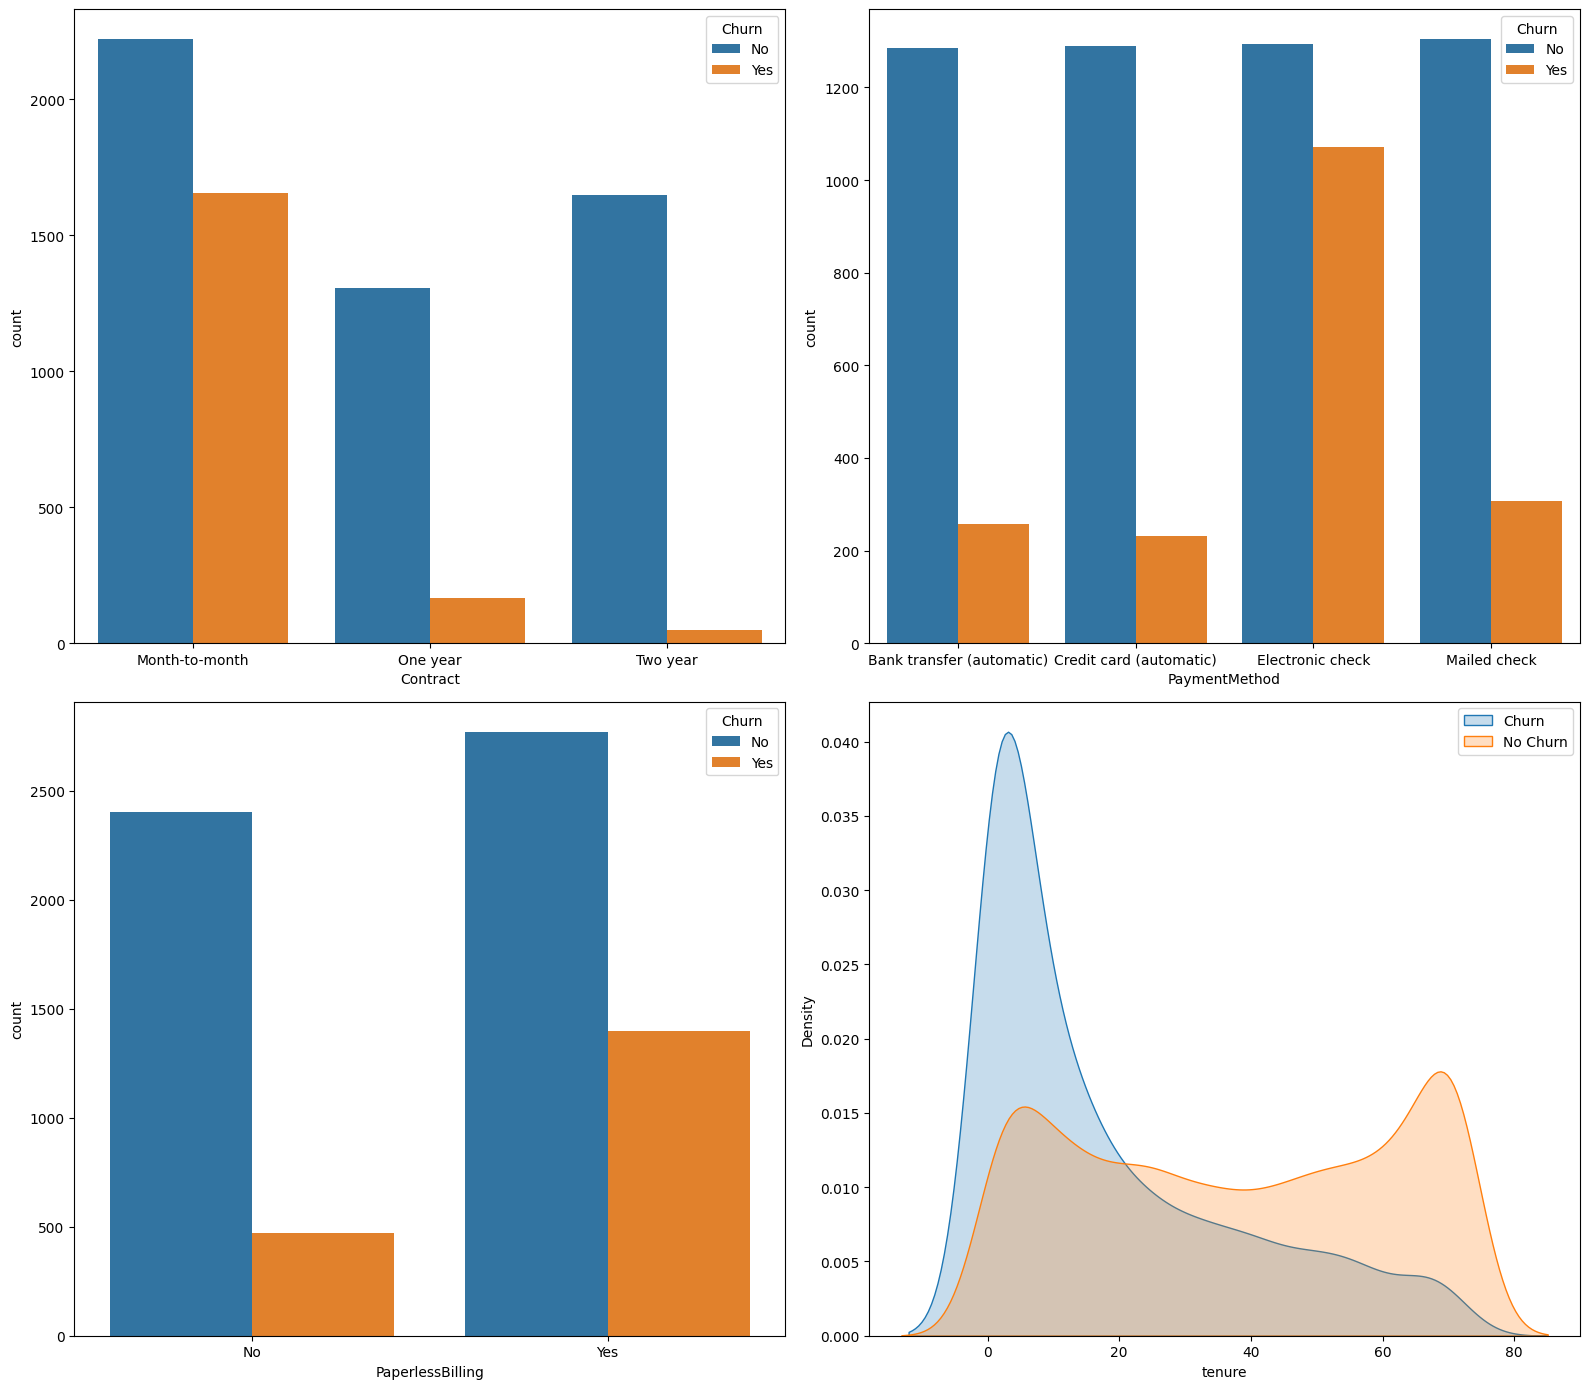

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0,0])
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0,1])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=axes[1,0])

sns.kdeplot(data=df[df['Churn'] == 'Yes']['tenure'], fill=True, ax=axes[1,1], label='Churn')
sns.kdeplot(data=df[df['Churn'] == 'No']['tenure'], fill=True, ax=axes[1,1], label='No Churn')
axes[1,1].legend()

plt.tight_layout()
plt.show()

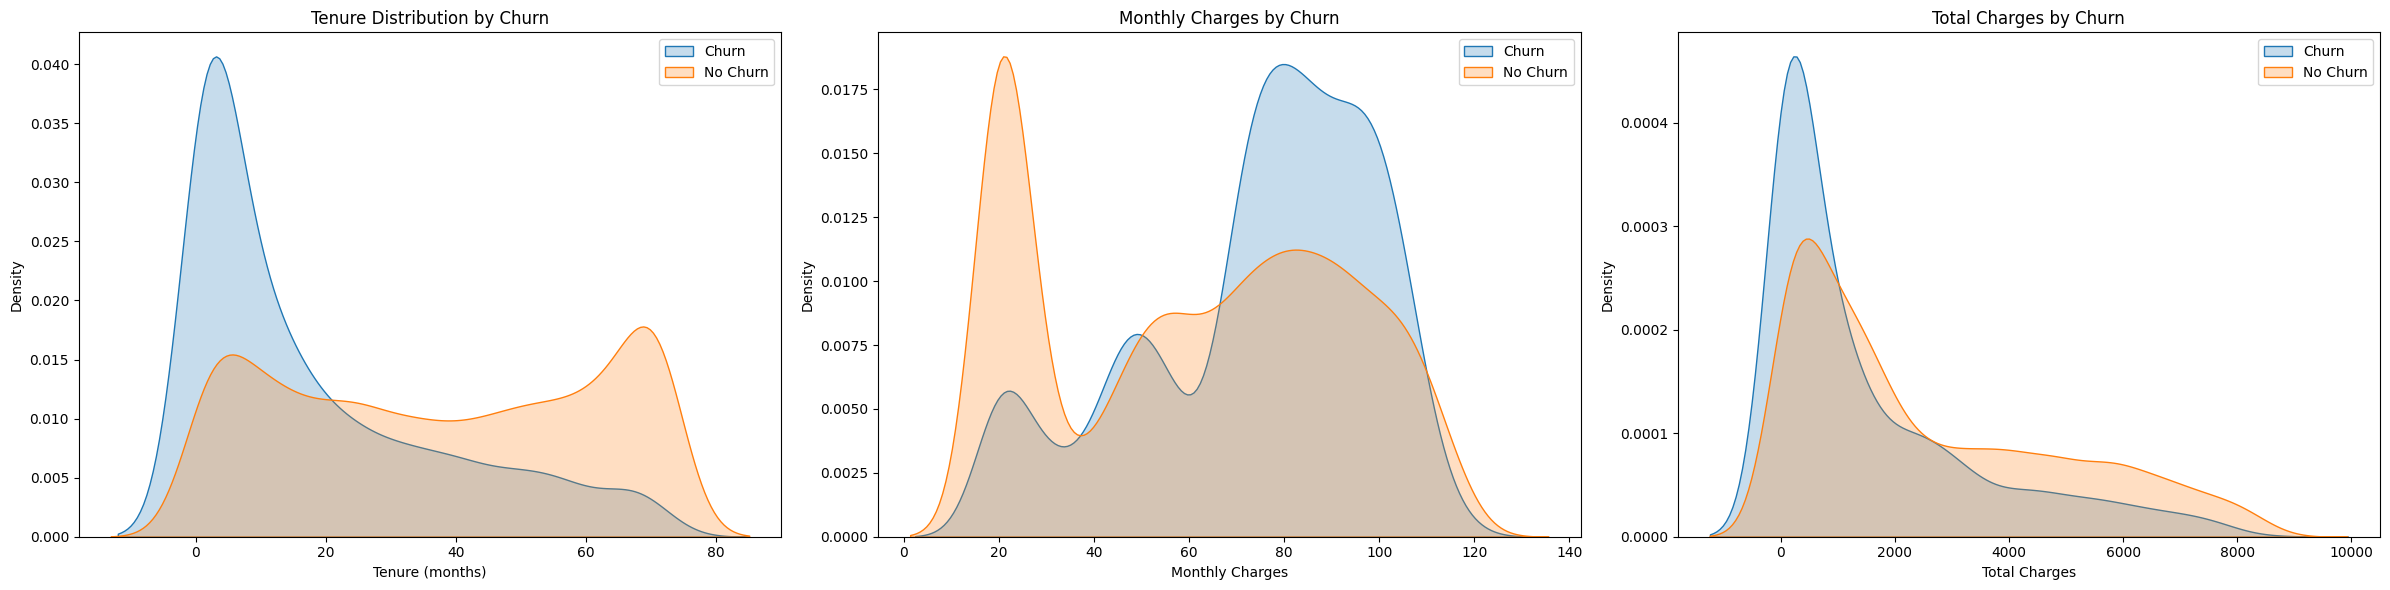

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Tenure
sns.kdeplot(data=df[df['Churn']=="Yes"]['tenure'], fill=True, ax=axes[0], label="Churn")
sns.kdeplot(data=df[df['Churn']=="No"]['tenure'], fill=True, ax=axes[0], label="No Churn")
axes[0].set_title("Tenure Distribution by Churn")
axes[0].set_xlabel("Tenure (months)")
axes[0].legend()

# Monthly Charges
sns.kdeplot(data=df[df['Churn']=="Yes"]['MonthlyCharges'], fill=True, ax=axes[1], label="Churn")
sns.kdeplot(data=df[df['Churn']=="No"]['MonthlyCharges'], fill=True, ax=axes[1], label="No Churn")
axes[1].set_title("Monthly Charges by Churn")
axes[1].set_xlabel("Monthly Charges")
axes[1].legend()

# Total Charges
sns.kdeplot(data=df[df['Churn']=="Yes"]['TotalCharges'], fill=True, ax=axes[2], label="Churn")
sns.kdeplot(data=df[df['Churn']=="No"]['TotalCharges'], fill=True, ax=axes[2], label="No Churn")
axes[2].set_title("Total Charges by Churn")
axes[2].set_xlabel("Total Charges")
axes[2].legend()

plt.tight_layout()
plt.show()

### ML prep
#### Feature Engineering & Preprocessing
- Scaling numerical features
- Label encoding
- Preparing X and y


In [122]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [123]:
df_labels = df.copy()
df_labels = df_labels.dropna(subset = ['Churn', 'TotalCharges'])

le = LabelEncoder()

df_labels_cols = [ 
    'gender', 
    'Partner', 
    'Dependents', 
    'PhoneService', 
    'MultipleLines', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'PaperlessBilling', 
    'Churn'
] 
for col in df_labels_cols: 
    df_labels[col] = le.fit_transform(df_labels[col]) 

In [124]:
df_labels = pd.get_dummies(df_labels, columns = ['InternetService', 'Contract', 'PaymentMethod']) 

In [125]:
cols = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

scaler = StandardScaler()

for col in cols: 
    df_labels[cols] = scaler.fit_transform(df_labels[cols])


In [126]:
X = df_labels.drop(columns = ['Churn', 'customerID'], axis=1)
y = df_labels['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify= y)


### ML model
- Using Logistic Regression to predict customer churn. 
- The model provides coefficients that help identify the most influential features.

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [129]:
y_pred = model.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# accuracy metric 
accuracy = accuracy_score(y_test, y_pred)
#precision 
precision = precision_score(y_test, y_pred)
#recall
recall = recall_score(y_test, y_pred)
#f1 score 
f1_score = f1_score(y_test, y_pred)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print(f1_score)
print(cm)


0.8038379530916845
0.649390243902439
0.56951871657754
0.6068376068376068
[[918 115]
 [161 213]]


#### Feature Importance
Extract coefficients from the logistic model, convert them to absolute values, and identify top 5 or top 10 important features.


In [133]:
# 1. Get coefficients from the model
coeffs = model.coef_[0]

# 2. Get the feature names
features = X_train.columns

# 3. Combine into a dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coeffs
})

# 4. Add absolute values for sorting
importance_df['Importance'] = importance_df['Coefficient'].abs()

# 5. Sort by most important features
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df


,Feature,Coefficient,Importance
4,tenure,-1.346313,1.346313
18,InternetService_No,-1.209062,1.209062
21,Contract_Two year,-0.895332,0.895332
17,InternetService_Fiber optic,0.757922,0.757922
15,TotalCharges,0.634431,0.634431
19,Contract_Month-to-month,0.496268,0.496268
5,PhoneService,-0.474871,0.474871
7,OnlineSecurity,-0.398206,0.398206
10,TechSupport,-0.356310,0.356310
6,MultipleLines,0.334569,0.334569
